## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Checking the number of mice.
merged_data_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = pd.DataFrame(merged_data_df, columns=["Mouse ID", "Timepoint"])
duplicate_data_rows = duplicate_data[duplicate_data.duplicated(keep = 'last')]
print(duplicate_data_rows)

    Mouse ID  Timepoint
908     g989          0
910     g989          5
912     g989         10
914     g989         15
916     g989         20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupilcateslist = merged_data_df.loc[[908,910,912,914,916],:]
dupilcateslist

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_list = merged_data_df.drop([908,910,912,914,916], axis=0)
cleaned_list.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_list["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Grouby Drug Regimen
Grouped_clean_list = (cleaned_list.groupby(['Drug Regimen']))

grouped_regimen_mean = round(pd.DataFrame((cleaned_list.groupby(['Drug Regimen']).mean())),2)
grouped_regimen_mean = grouped_regimen_mean.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_mean = grouped_regimen_mean.rename(columns = {"Tumor Volume (mm3)":"Mean"})

grouped_regimen_median = round(pd.DataFrame((cleaned_list.groupby(['Drug Regimen']).median())),2)
grouped_regimen_median = grouped_regimen_median.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_median = grouped_regimen_median.rename(columns = {"Tumor Volume (mm3)":"Median"})

Summary_Statistics = pd.merge(grouped_regimen_mean, grouped_regimen_median, how="left", on="Drug Regimen")


grouped_regimen_variance = round(pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).var()),2)
grouped_regimen_variance = grouped_regimen_variance.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_variance = grouped_regimen_variance.rename(columns = {"Tumor Volume (mm3)":"Variance"})
Summary_Statistics = pd.merge(Summary_Statistics, grouped_regimen_variance, how="left", on="Drug Regimen")

grouped_regimen_stddev = round(pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).std()),2)
grouped_regimen_stddev = grouped_regimen_stddev.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_stddev = grouped_regimen_stddev.rename(columns = {"Tumor Volume (mm3)":"Std Dev"})
Summary_Statistics = pd.merge(Summary_Statistics, grouped_regimen_stddev, how="left", on="Drug Regimen")

grouped_regimen_sem = round(pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).sem()),2)
grouped_regimen_sem = grouped_regimen_sem.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Mouse ID","Sex"], axis=1)
grouped_regimen_sem = grouped_regimen_sem.rename(columns = {"Tumor Volume (mm3)":"SEM"})
Summary_Statistics = pd.merge(Summary_Statistics, grouped_regimen_sem, how="left", on="Drug Regimen")
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Statistics


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

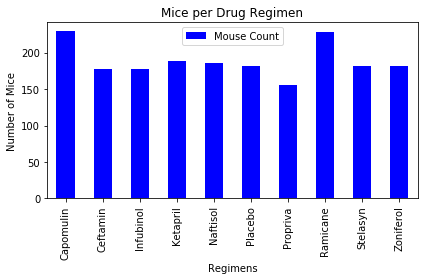

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).count())
mouse_count = mouse_count.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Tumor Volume (mm3)","Sex"], axis=1)
mouse_count = mouse_count.rename(columns = {"Mouse ID":"Mouse Count"})
mouse_count_plot = mouse_count.plot(kind="bar",facecolor="blue")
plt.title("Mice per Drug Regimen")
plt.xlabel("Regimens")
plt.ylabel("Number of Mice")
plt.tight_layout()
mouse_count_plot;

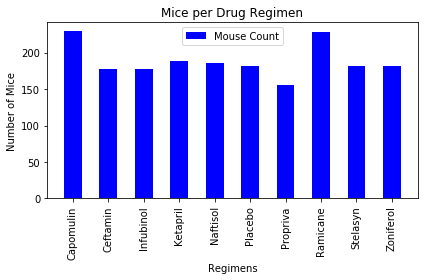

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

count_bar = cleaned_list.groupby(['Drug Regimen']).count()
count_bar



plt.bar(count_bar.index.values,count_bar["Mouse ID"],color='blue', alpha=1, align="center",width =0.5, label = "Mouse Count")
plt.title("Mice per Drug Regimen")
plt.xlabel("Regimens")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.legend(loc="best")
plt.tight_layout()
plt.bar;

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = pd.DataFrame(cleaned_list.groupby(['Sex']).count())
sex_count = sex_count.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Tumor Volume (mm3)","Drug Regimen"], axis=1)
sex_count = pd.DataFrame(sex_count.reset_index())
sex_count
sex_plot = sex_count.plot.pie(y='Sex', figsize=(5, 5))
#sex_count_pie = sex_count.plot(kind="bar")
#plt.title("Sex of Mice")
#plt.tight_layout()
#sex_count_plot;

TypeError: '<' not supported between instances of 'str' and 'int'

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
